In [35]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()

In [36]:
train_df=pd.read_excel('Data_Train.xlsx')  #Test_set.xlsx

In [37]:
pd.set_option('display.max_columns',None)

In [38]:
train_df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [40]:
train_df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [41]:
train_df.isna().any().sum()

2

In [42]:
train_df.dropna(inplace=True)

In [43]:
train_df.isna().any().sum()

0

Exploratory Data Analysis

In [44]:
train_df['Journey_day']=pd.to_datetime(train_df.Date_of_Journey, format="%d/%m/%Y").dt.day

In [45]:
train_df["Journey_month"] = pd.to_datetime(train_df["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [46]:
train_df["Journey_year"] = pd.to_datetime(train_df["Date_of_Journey"], format = "%d/%m/%Y").dt.year

In [47]:
train_df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019


In [48]:
train_df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [49]:
train_df["Dep_hour"] = pd.to_datetime(train_df["Dep_Time"]).dt.hour


In [50]:
train_df["Dep_min"] = pd.to_datetime(train_df["Dep_Time"]).dt.minute

In [51]:
train_df.drop(["Dep_Time"], axis = 1, inplace = True)

In [52]:
# Extracting Hours
train_df["Arrival_hour"] = pd.to_datetime(train_df.Arrival_Time).dt.hour

# Extracting Minutes
train_df["Arrival_min"] = pd.to_datetime(train_df.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [53]:
train_df.shape

(10682, 15)

In [54]:
duration = list(train_df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 

In [55]:
train_df['duration_hours']=duration_hours
train_df['duration_mins']=duration_mins

In [56]:
train_df.drop(['Duration'],axis=1,inplace=True)

In [57]:
train_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [58]:
train_df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

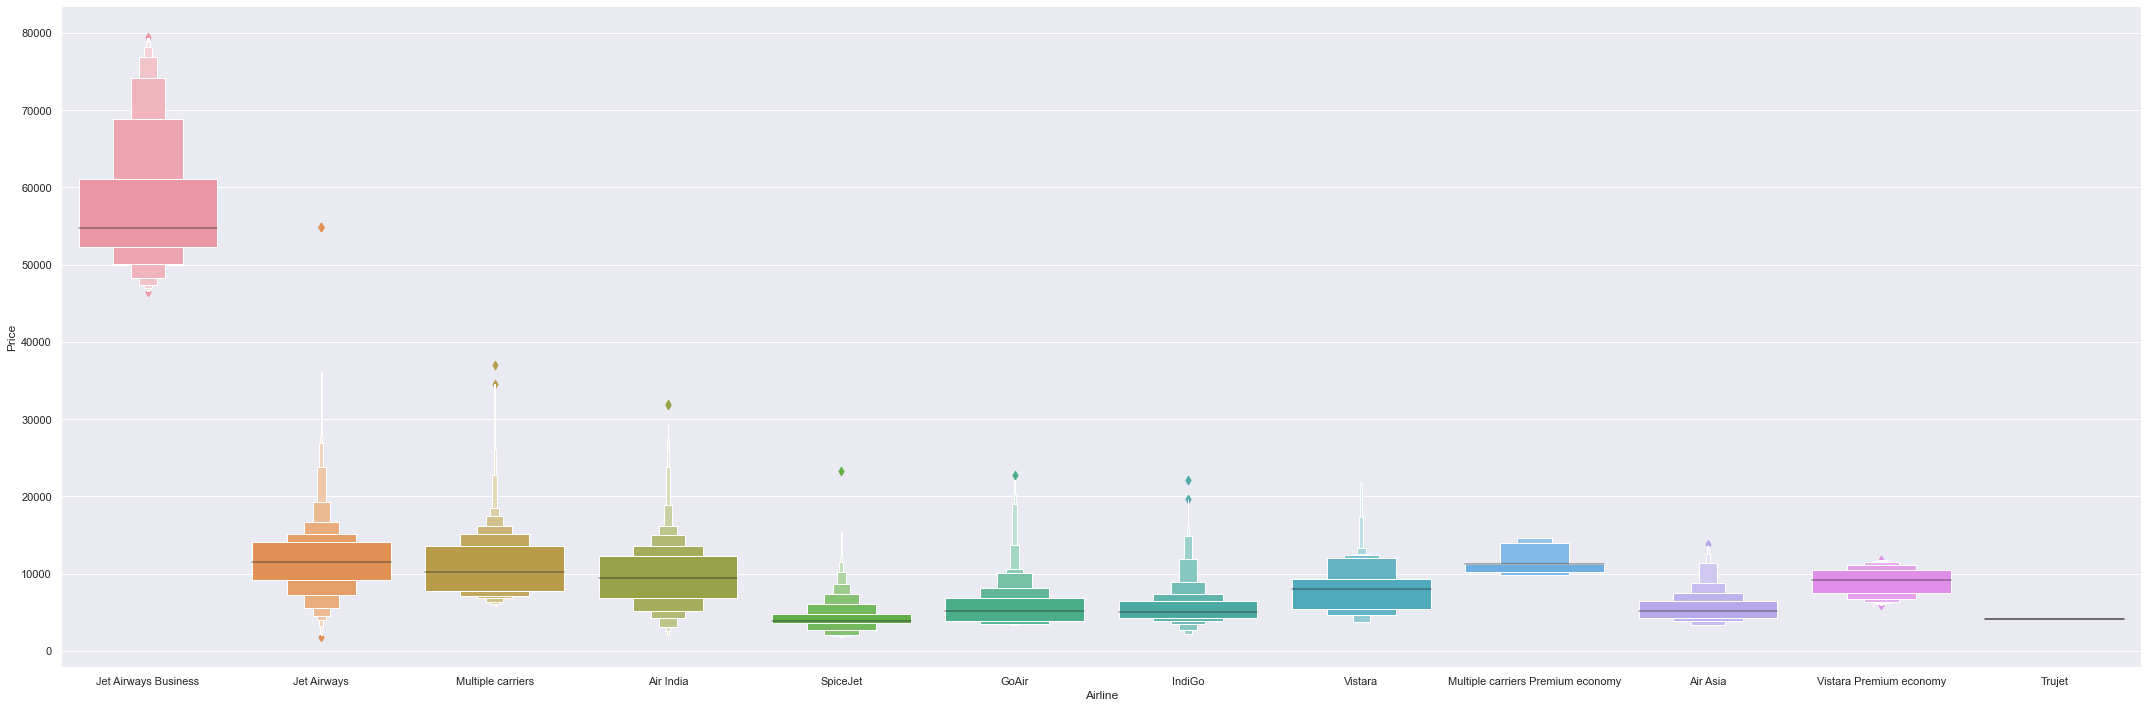

In [59]:
sns.catplot(y='Price',x='Airline',data=train_df.sort_values('Price',ascending=False),kind='boxen', height=10,aspect=3)

In [60]:
train_df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Total_Stops        object
Additional_Info    object
Price               int64
Journey_day         int64
Journey_month       int64
Journey_year        int64
Dep_hour            int64
Dep_min             int64
Arrival_hour        int64
Arrival_min         int64
duration_hours      int64
duration_mins       int64
dtype: object

In [61]:
obj=['Airline','Source','Destination','Route','Total_Stops','Additional_Info']

In [62]:
from sklearn.preprocessing import OrdinalEncoder

encod=OrdinalEncoder()
train_df[obj]=encod.fit_transform(train_df[obj]).astype(int)

In [63]:
train_df.dtypes

Airline            int32
Source             int32
Destination        int32
Route              int32
Total_Stops        int32
Additional_Info    int32
Price              int64
Journey_day        int64
Journey_month      int64
Journey_year       int64
Dep_hour           int64
Dep_min            int64
Arrival_hour       int64
Arrival_min        int64
duration_hours     int64
duration_mins      int64
dtype: object

In [64]:
train_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins
0,3,0,5,18,4,8,3897,24,3,2019,22,20,1,10,2,50
1,1,3,0,84,1,8,7662,1,5,2019,5,50,13,15,7,25
2,4,2,1,118,1,8,13882,9,6,2019,9,25,4,25,19,0
3,3,3,0,91,0,8,6218,12,5,2019,18,5,23,30,5,25
4,3,0,5,29,0,8,13302,1,3,2019,16,50,21,35,4,45


In [65]:
y=train_df['Price']

In [66]:
train_df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'duration_hours', 'duration_mins'],
      dtype='object')

In [68]:
x=train_df[['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info','Journey_day', 'Journey_month',
       'Journey_year', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'duration_hours', 'duration_mins']]

In [69]:
x.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins
0,3,0,5,18,4,8,24,3,2019,22,20,1,10,2,50
1,1,3,0,84,1,8,1,5,2019,5,50,13,15,7,25
2,4,2,1,118,1,8,9,6,2019,9,25,4,25,19,0
3,3,3,0,91,0,8,12,5,2019,18,5,23,30,5,25
4,3,0,5,29,0,8,1,3,2019,16,50,21,35,4,45


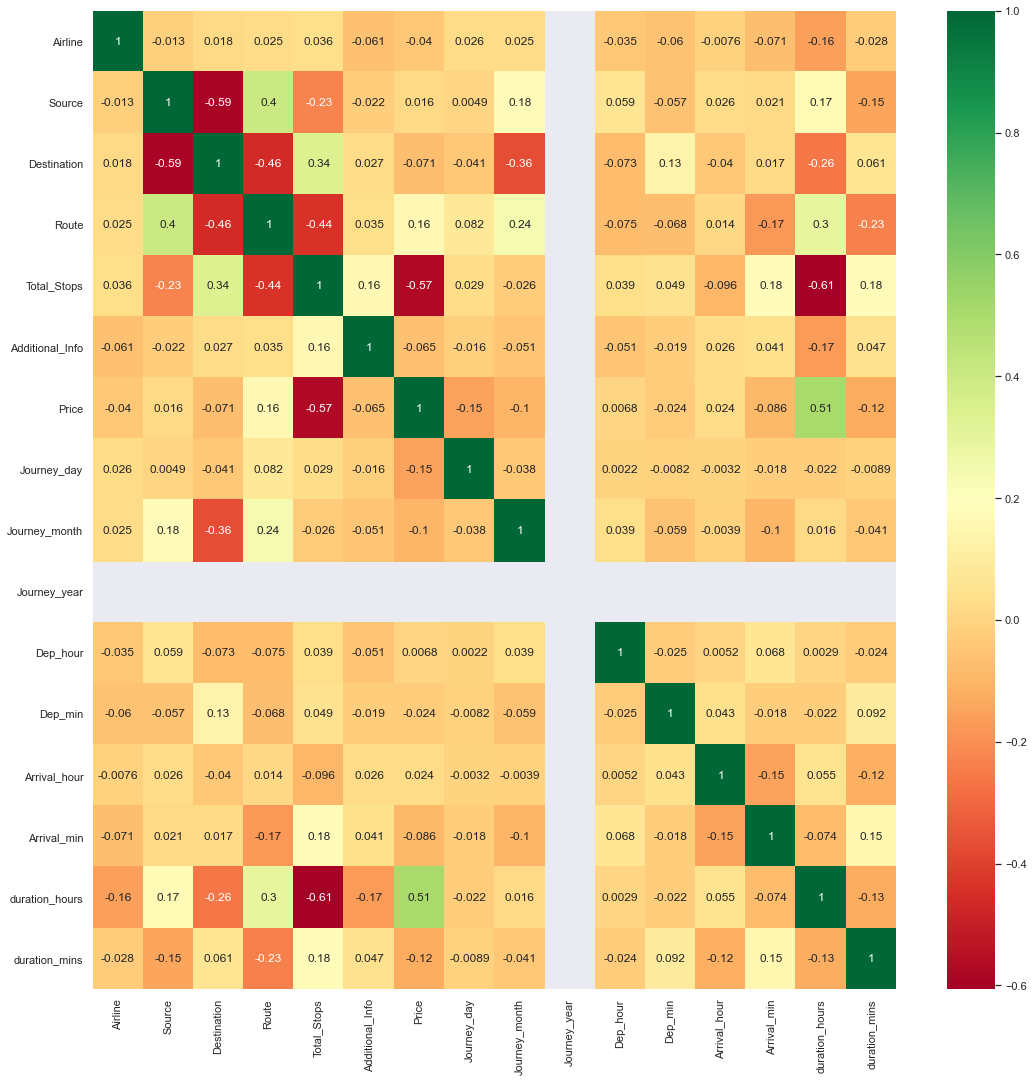

In [70]:
plt.figure(figsize = (18,18))
sns.heatmap(train_df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [72]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

In [73]:
print(selection.feature_importances_)

[0.12703103 0.01115717 0.02320061 0.05653701 0.36875939 0.05607172
 0.13368895 0.04708637 0.         0.02118674 0.01951438 0.02534904
 0.01656679 0.0784535  0.01539728]


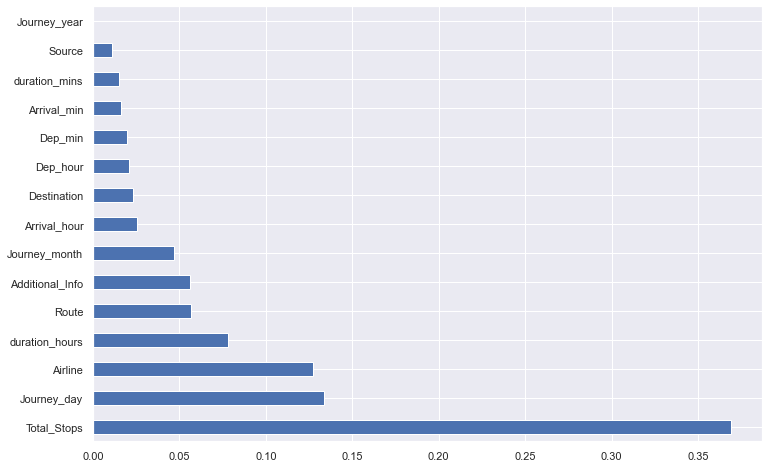

In [75]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [89]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()


In [90]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [91]:
y_pred = model.predict(X_test)

In [94]:
model.score(X_train, y_train)

0.9813698241678408

In [95]:
model.score(X_test, y_test)

0.8648126976829578

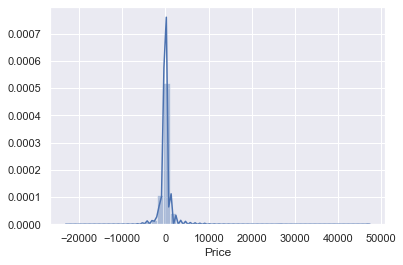

In [96]:
sns.distplot(y_test-y_pred)
plt.show()

In [97]:
import pickle

In [99]:
file=open('fli_rf.pkl','wb')

In [100]:
pickle.dump(model, file)

In [102]:
model2=open('fli_rf.pkl','rb')
forest = pickle.load(model2)

In [103]:
predition= forest.predict(X_test)